# Cars4U

# Description

# Context:

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

# Problem and Questions

It is difficult to determine the price of used cars. Create a regression model that effectively predicts the price of used vehicles. The following questions will be answered: 1- What are the key features influencing the price of a used car? 2- How does the regression model perform to predict the price of used cars?

# Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase (cities)
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
Price: The price of the used car in INR Lakhs

# Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None) # display all columns
pd.set_option("display.max_rows", 200)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading and Exploring the data

In [2]:
df=pd.read_csv("used_cars_data.csv")

In [3]:
df.head() #Let's view the first five rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [4]:
print(f"there are {df.shape[0]} rows and {df.shape[1]} coulmns") # checking the shape of the data

there are 7253 rows and 14 coulmns


In [5]:
df.isnull().sum().sort_values(ascending=False) # looking missing values

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
New_Price               0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [6]:
df.duplicated().sum() # checking duplicated rows

0

In [7]:
df.dtypes #checking column datatypes 

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [8]:
df.info() #checking column datatypes and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

1) There are 7253 rows and 14 columns. Price has 1234, Power has 175, Seats has 53, Engine has 46, and Mileage has 2 missing values. 
2) Data type of Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Name, and Location are object, and the other variables are integer or float
3) Mileage, Engine, Power are object data types, but they should be numeric. 
4) There are 2041 unique car names, and a column should be created that has the brand names of the cars.
5) There are no duplicated rows.
6) There are 11 different Locations.
7) Manual cars are more than automated cars
8) Drop the S.No. column
9) Most frequent location is Mumbai
10) Dependent variable is Price, and the other variables are independent. 

# Processing Columns

In [10]:
def new_mile(mil):
    if isinstance(mil,str):
        return float(mil.replace("km/kg","").replace("kmpl",""))
    else:
        return np.nan #"kmpl and km/kg are units associated with different types of fuel, but both the units refer to the distance covered (in km) per unit of fuel. So, there is no need to convert between them. The units can be stripped off and the numerical values can be used as they are.(retrieved from https://olympus.mygreatlearning.com/courses/59530/pages/faq-cars4u-2?module_item_id=2111392)

In [11]:
df["Mileage"]= df["Mileage"].apply(new_mile)

In [12]:
np.random.seed(1)
df.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.00,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.50,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.10,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.00,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.90,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.00,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.50,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.50,1199 CC,88.7 bhp,5.0,9.36,8.20


In [13]:
def new_col(val):
    if isinstance(val,str):
        if val.endswith("CC"):
            return float(val.replace("CC",""))
        elif val.endswith("bhp"):
            return float(val.replace("bhp",""))
    else:
        return np.nan

In [14]:
df["Power"]=df["Power"].apply(new_col)
df["Engine"]=df["Engine"].apply(new_col)

In [15]:
df["Brand"]=df["Name"].str.split(" ").str[0]

In [16]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [17]:
df.loc[df.Brand == "ISUZU","Brand"]="Isuzu"
df.loc[df.Brand=="Mini","Brand"]="Mini Cooper"
df.loc[df.Brand=="Land","Brand"]="Land Rover"
df.loc[df.Brand=="OpelCorsa","Brand"]="Opel"

In [18]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'Opel'], dtype=object)

In [19]:
df.drop(columns=["Name","S.No."], inplace=True)

In [20]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi


In [21]:
df["Brand"].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
Opel                1
Smart               1
Ambassador          1
Hindustan           1
Name: Brand, dtype: int64

In [22]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
Brand                 object
dtype: object

In [23]:
df["Owner_Type"]=df["Owner_Type"].astype("category")
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")
df["Location"]=df["Location"].astype("category")
df["Brand"]=df["Brand"].astype("category")

In [24]:
df.dtypes # rechecked the datatypes

Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
Brand                category
dtype: object

# Missing Values

In [25]:
df.describe(include="all").T # Mileage and Seats have min value 0

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,NaN,NaN,NaN,18.1416,4.5622,0,15.17,18.16,21.1,33.54
Engine,7207,NaN,NaN,NaN,1616.57,595.285,72,1198,1493,1968,5998
Power,7078,NaN,NaN,NaN,112.765,53.4936,34.2,75,94,138.1,616
Seats,7200,NaN,NaN,NaN,5.27972,0.81166,0,5,5,5,10


In [26]:
df.isnull().sum().sort_values(ascending=False) #Price,Power,Seats,Engine, and Mileage have missing values

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Brand                   0
New_Price               0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
dtype: int64

In [27]:
df.isnull().sum(axis=1).value_counts() # 5872 rows do not have missing values. 

0    5872
1    1308
3      36
2      27
4      10
dtype: int64

In [28]:
num_missing_val=df.isnull().sum(axis=1)
num_missing_val.value_counts()

0    5872
1    1308
3      36
2      27
4      10
dtype: int64

In [29]:
df[num_missing_val==3].sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
4229,Bangalore,2005,79000,Petrol,Manual,Second,17.00,NaN,NaN,NaN,4.55,1.65,Hyundai
4577,Delhi,2012,72000,Diesel,Automatic,Third,18.48,NaN,NaN,NaN,67.87,13.85,BMW
3810,Kolkata,2013,27000,Petrol,Automatic,First,14.00,NaN,NaN,NaN,33.51,11.99,Honda
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,7.88,1.75,Maruti
4712,Pune,2003,80000,Petrol,Manual,Second,17.00,NaN,NaN,NaN,4.55,0.90,Hyundai


In [30]:
df[num_missing_val==4].sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
6651,Kolkata,2015,36009,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,NaN,Maruti
6685,Pune,2010,115000,Petrol,Manual,Second,16.10,NaN,NaN,NaN,7.880,NaN,Maruti
6544,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,NaN,NaN,NaN,10.250,NaN,Hyundai
6880,Chennai,2009,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.870,NaN,BMW
6677,Jaipur,2010,65000,Petrol,Manual,Third,14.60,NaN,NaN,NaN,8.600,NaN,Fiat
6541,Bangalore,2012,56600,Diesel,Manual,First,23.59,NaN,NaN,NaN,8.525,NaN,Toyota
6902,Kochi,2012,59311,Petrol,Manual,First,18.30,NaN,NaN,NaN,8.525,NaN,Toyota
6633,Kolkata,2016,27000,Diesel,Manual,First,0.00,NaN,NaN,NaN,18.865,NaN,Mahindra
6042,Bangalore,2009,72000,Petrol,Manual,Second,17.50,NaN,NaN,NaN,25.830,NaN,Skoda
6643,Bangalore,2009,150000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.870,NaN,BMW


In [31]:
df["Engine"].fillna(df.Engine.median(), inplace=True) #Fill the missing values with median of the column
df["Power"].fillna(df.Power.median(), inplace=True)

In [32]:
df.loc[df["Mileage"]==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
14,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,120.000,17.50,Land Rover
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.140,35.67,Mercedes-Benz
79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,94.00,5.0,4.550,1.30,Hyundai
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493.0,94.00,NaN,13.580,2.95,Honda
229,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.00,NaN,7.650,3.60,Ford
262,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086.0,94.00,5.0,4.550,1.75,Hyundai
307,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086.0,94.00,5.0,4.550,1.50,Hyundai
424,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,94.00,5.0,10.150,5.45,Volkswagen
443,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,94.00,5.0,4.550,3.35,Hyundai
544,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,49.490,38.99,Mercedes-Benz


In [33]:
df.loc[df["Mileage"]==0]["Mileage"].count() #There are 81 cars that have 0 mileage, it is not normal that a used car has 0 mileage

81

In [34]:
df.loc[df["Mileage"]==0, "Mileage"]=np.nan

In [35]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                  0
Power                   0
Seats                  53
New_Price               0
Price                1234
Brand                   0
dtype: int64

In [36]:
df.loc[df["Seats"]==0] #there is one car that has 0 seat, that need to be NaN

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,94.0,0.0,53.14,18.0,Audi


In [37]:
df.loc[df["Seats"]==0, "Seats"]=np.nan

In [38]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                  0
Power                   0
Seats                  54
New_Price               0
Price                1234
Brand                   0
dtype: int64

In [39]:
df["Seats"].fillna(df.Seats.median(), inplace=True)

In [40]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1234
Brand                   0
dtype: int64

In [41]:
df["Mileage"].fillna(df.Mileage.median(), inplace=True) 

In [42]:
df1= df.loc[df['Price'].notnull(),:] #Drop the missing values on Price

In [43]:
df1.isnull().sum() #There is no missing value

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

# EDA

In [44]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019,NaN,NaN,NaN,2013.36,3.26974,1998,2011,2014,2016,2019
Kilometers_Driven,6019,NaN,NaN,NaN,58738.4,91268.8,171,34000,53000,73000,6.5e+06
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019,NaN,NaN,NaN,18.3406,4.15115,6.4,15.4,18.2,21.1,33.54
Engine,6019,NaN,NaN,NaN,1620.51,599.635,72,1198,1493,1969,5998
Power,6019,NaN,NaN,NaN,112.796,53.3117,34.2,78,94,138.03,560
Seats,6019,NaN,NaN,NaN,5.27762,0.803479,2,5,5,5,10


C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


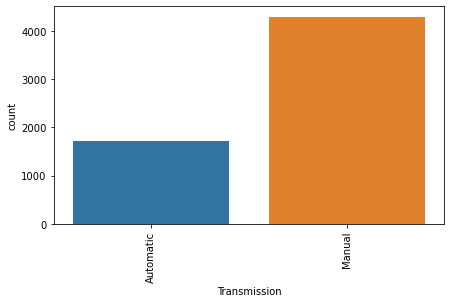

In [45]:
plt.figure(figsize=(7,4))
sns.countplot(df1["Transmission"])
plt.xticks(rotation=90)
plt.show()


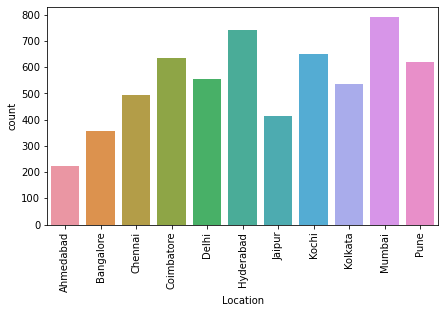

In [46]:
plt.figure(figsize=(7,4))
sns.countplot(df1["Location"])
plt.xticks(rotation=90)
plt.show()

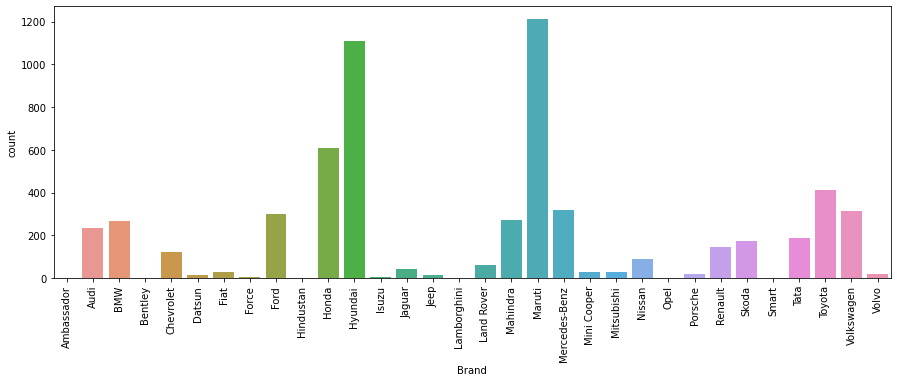

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(df1["Brand"])
plt.xticks(rotation=90)
plt.show()

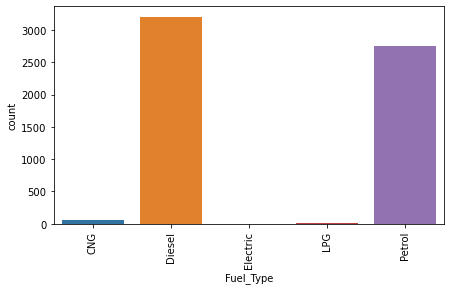

In [48]:
plt.figure(figsize=(7,4))
sns.countplot(df1["Fuel_Type"])
plt.xticks(rotation=90)
plt.show()

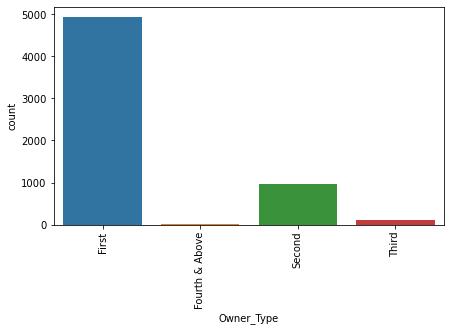

In [49]:
plt.figure(figsize=(7,4))
sns.countplot(df1["Owner_Type"])
plt.xticks(rotation=90)
plt.show()

### Observation

1)Used manual car is more preferred than used automated cars
2)Fuel types of used cars are mostly diesel or petrol
3) Mumbai and Hyderabad are the locations that are more popular in the used car market
4) Maruti and Hyundai are the most popular brands in used cars.
5) The first owner is more than the other types of owners

<Figure size 504x288 with 0 Axes>

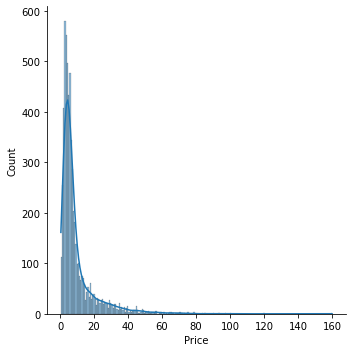

In [50]:
plt.figure(figsize=(7,4))
sns.displot(df1["Price"], kde=True)
plt.show()

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


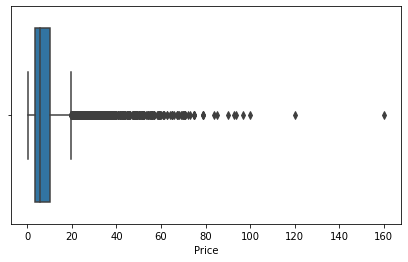

In [51]:
plt.figure(figsize=(7,4))
sns.boxplot(df1["Price"])
plt.show()

<Figure size 504x288 with 0 Axes>

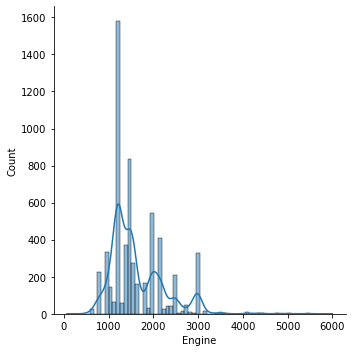

In [52]:
plt.figure(figsize=(7,4))
sns.displot(df1["Engine"], kde=True)
plt.show()

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


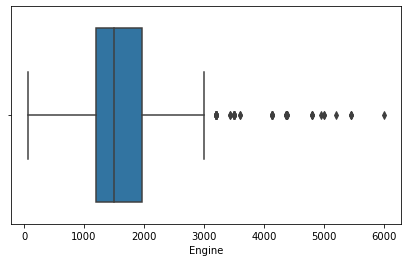

In [53]:
plt.figure(figsize=(7,4))
sns.boxplot(df1["Engine"])
plt.show()

<Figure size 504x288 with 0 Axes>

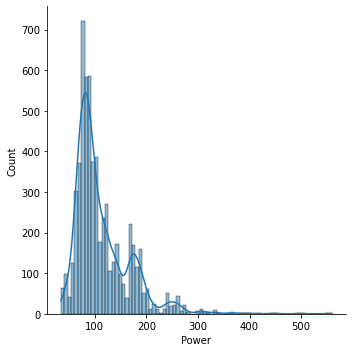

In [54]:
plt.figure(figsize=(7,4))
sns.displot(df1["Power"], kde=True)
plt.show()

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


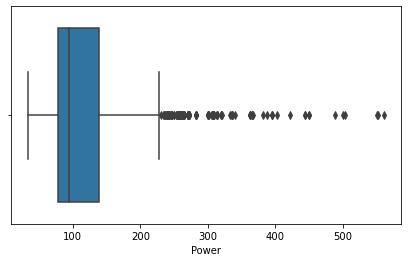

In [55]:
plt.figure(figsize=(7,4))
sns.boxplot(df1["Power"])
plt.show()

<Figure size 504x288 with 0 Axes>

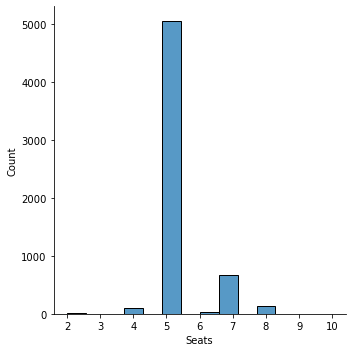

In [56]:
plt.figure(figsize=(7,4))
sns.displot(df1["Seats"])
plt.show()

<Figure size 504x288 with 0 Axes>

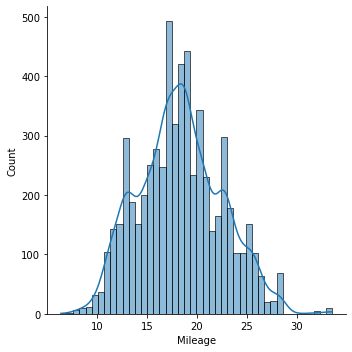

In [57]:
plt.figure(figsize=(7,4))
sns.displot(df1["Mileage"], kde=True)
plt.show()

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


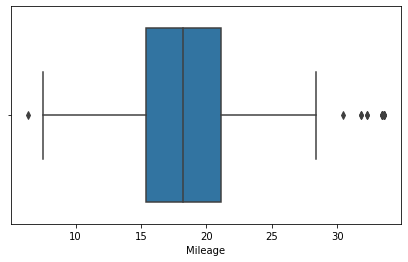

In [58]:
plt.figure(figsize=(7,4))
sns.boxplot(df1["Mileage"])
plt.show()

<Figure size 504x288 with 0 Axes>

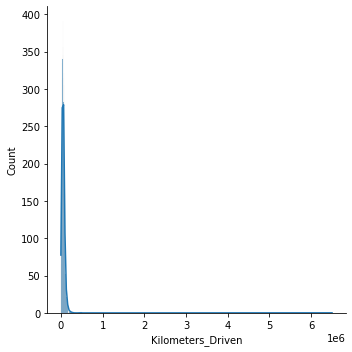

In [59]:
plt.figure(figsize=(7,4))
sns.displot(df1["Kilometers_Driven"], kde=True)
plt.show()

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


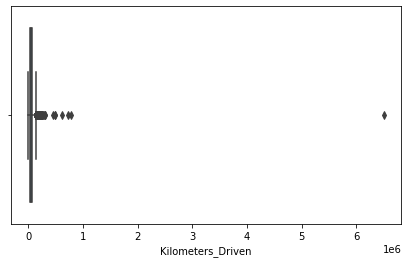

In [60]:
plt.figure(figsize=(7,4))
sns.boxplot(df1["Kilometers_Driven"])
plt.show()

<Figure size 504x288 with 0 Axes>

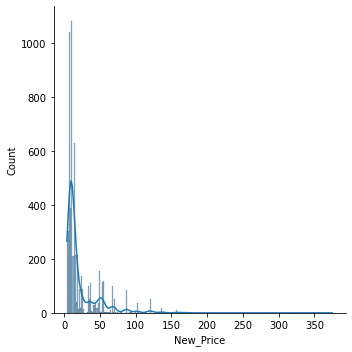

In [61]:
plt.figure(figsize=(7,4))
sns.displot(df1["New_Price"], kde=True)
plt.show()

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


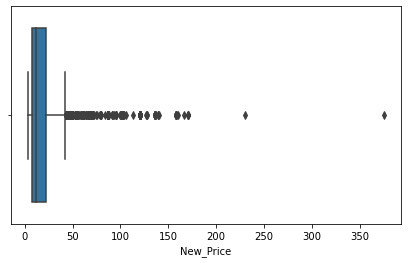

In [62]:
plt.figure(figsize=(7,4))
sns.boxplot(df1["New_Price"])
plt.show()

### Observation

Price, New_Price, and Kilometers_Driven are highly skewed, and some outliers need to be examined and treated in different ways.

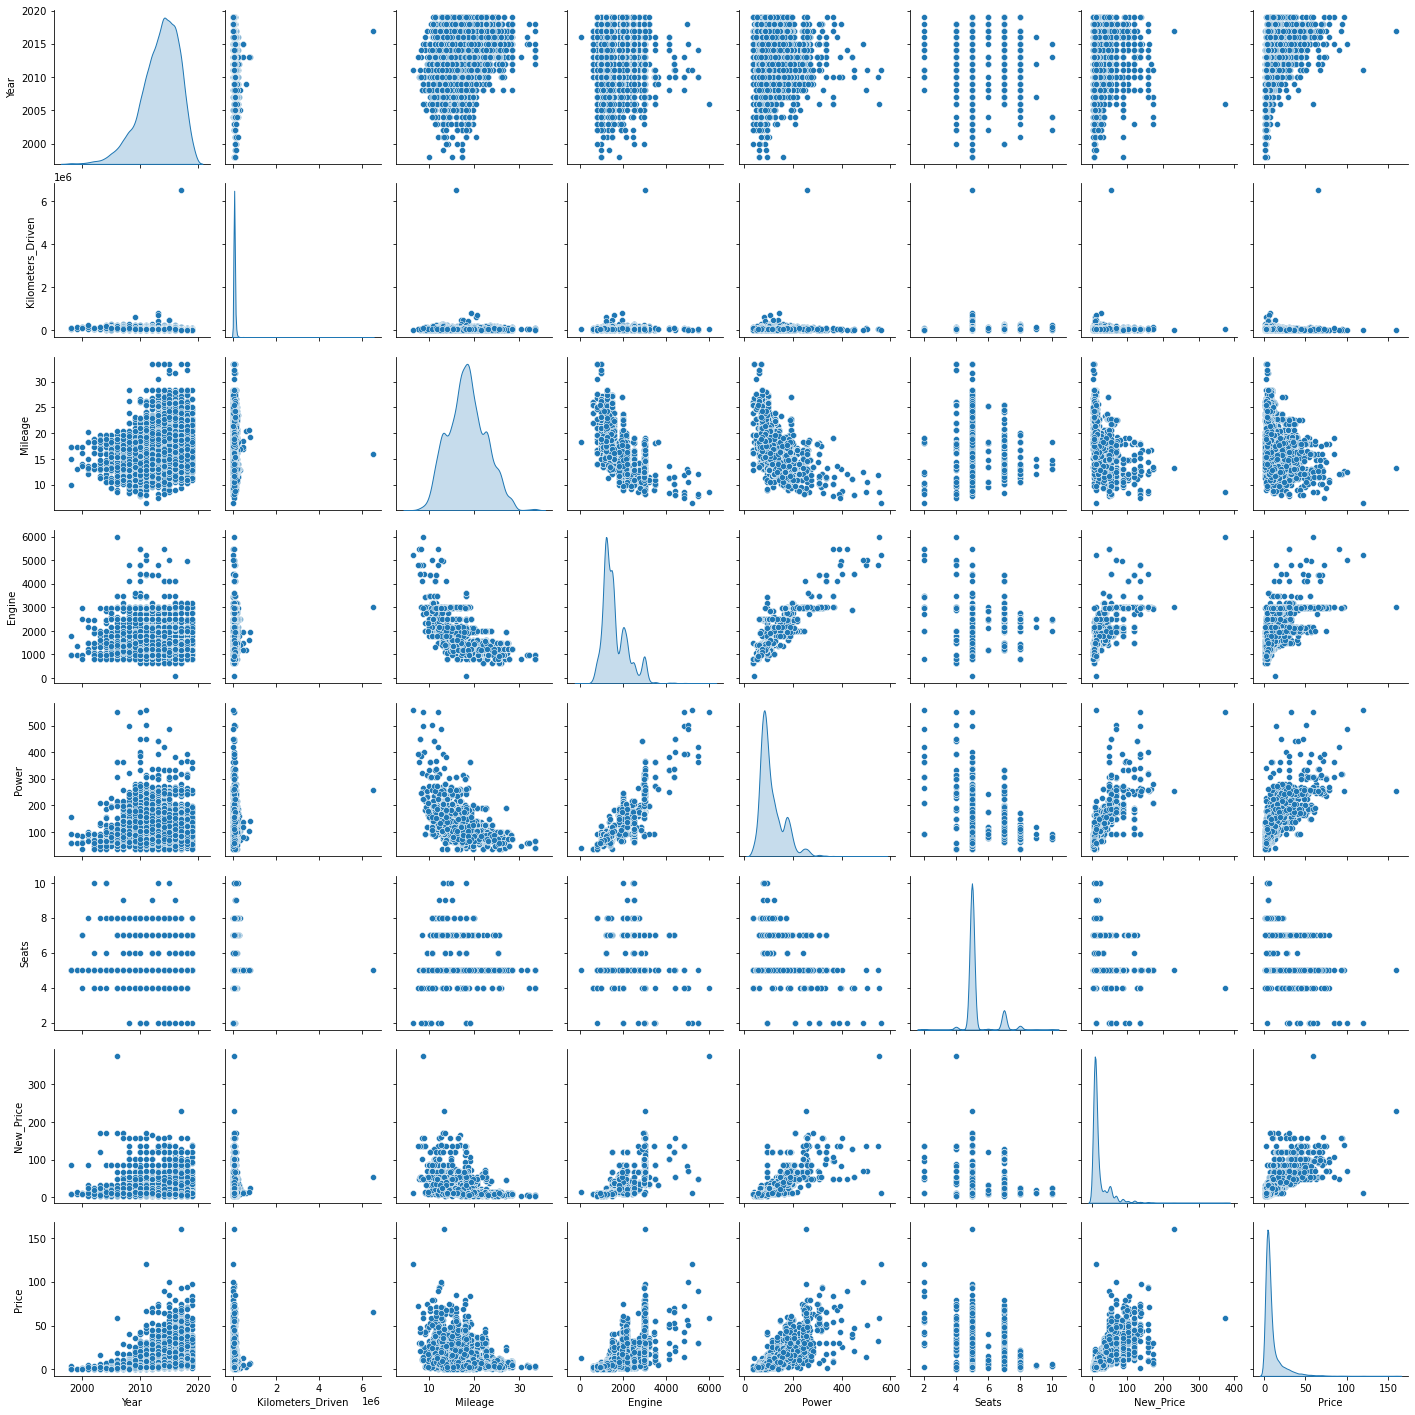

In [63]:
sns.pairplot(df1, diag_kind='kde');

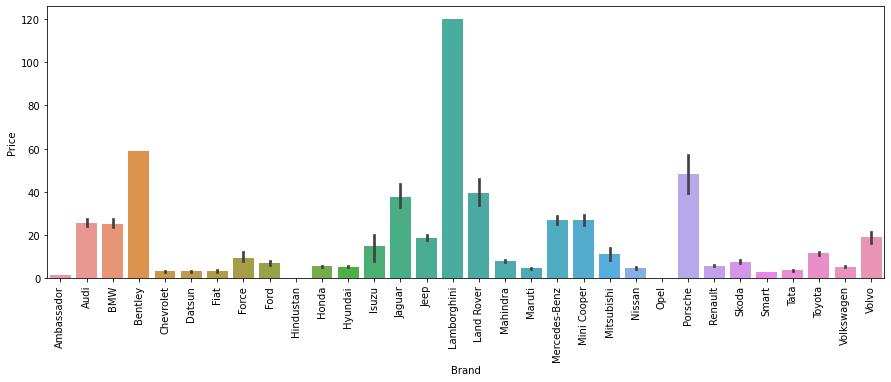

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(data=df1,x="Brand", y="Price")
plt.xticks(rotation=90)
plt.show()

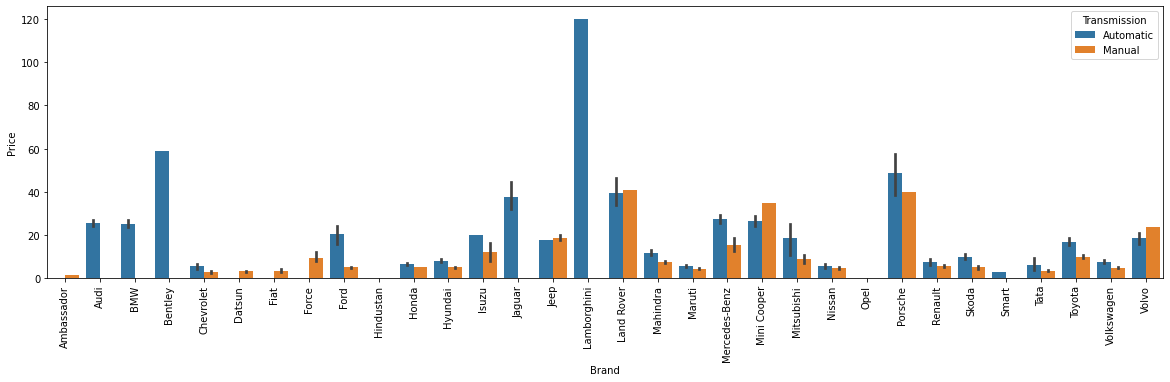

In [65]:
plt.figure(figsize=(20,5))
sns.barplot(data=df1,x="Brand", y="Price", hue="Transmission")
plt.xticks(rotation=90)
plt.show()

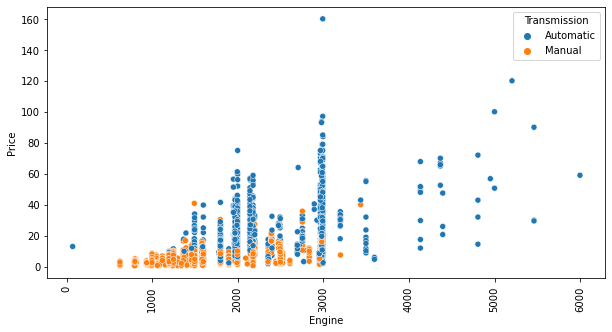

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Engine", y="Price", hue="Transmission")
plt.xticks(rotation=90)
plt.show()

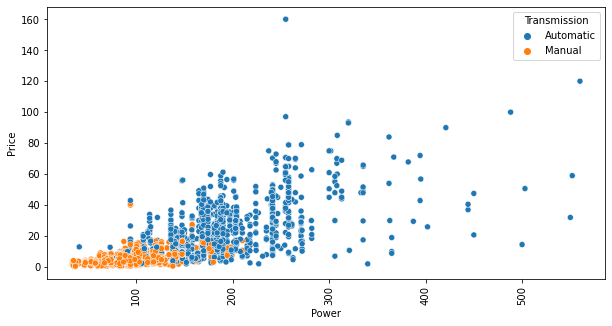

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Power", y="Price", hue="Transmission")
plt.xticks(rotation=90)
plt.show()

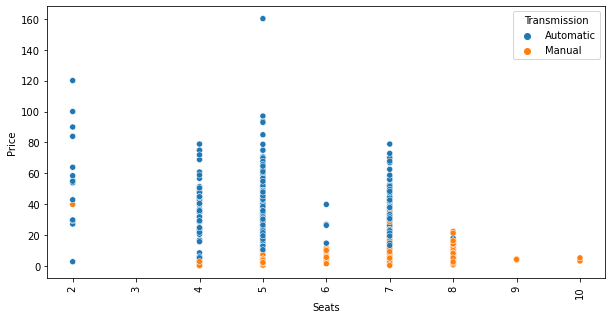

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Seats", y="Price", hue="Transmission")
plt.xticks(rotation=90)
plt.show()

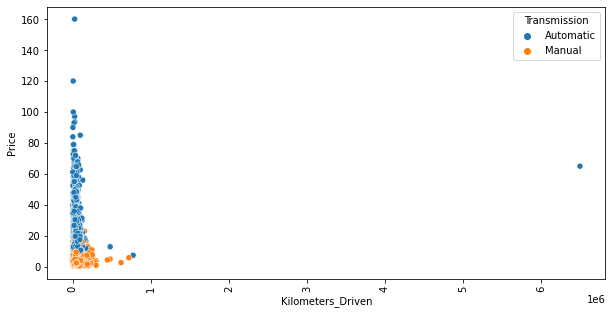

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Kilometers_Driven", y="Price", hue="Transmission")
plt.xticks(rotation=90)
plt.show()

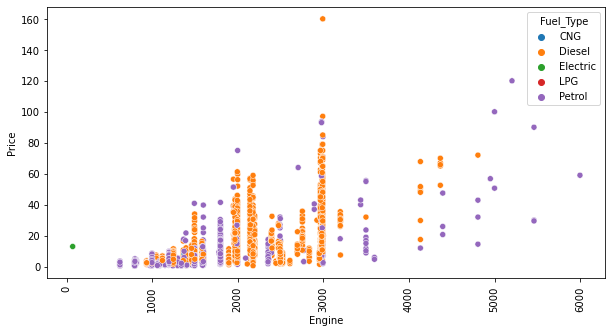

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Engine", y="Price", hue="Fuel_Type")
plt.xticks(rotation=90)
plt.show()

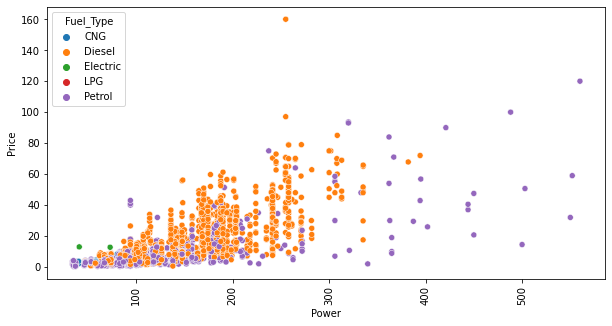

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Power", y="Price", hue="Fuel_Type")
plt.xticks(rotation=90)
plt.show()

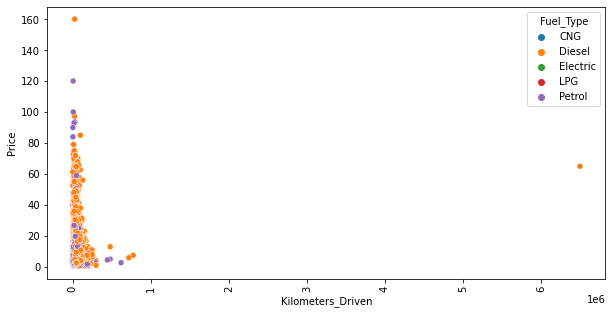

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="Kilometers_Driven", y="Price", hue="Fuel_Type")
plt.xticks(rotation=90)
plt.show()

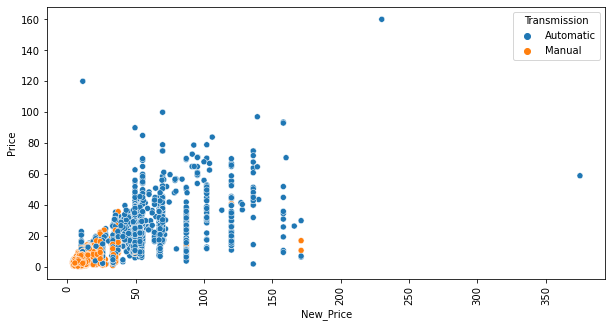

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x="New_Price", y="Price", hue="Transmission")
plt.xticks(rotation=90)
plt.show()

In [74]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187859,0.295417,-0.052736,0.025080,0.010522,-0.006277,0.305327
Kilometers_Driven,-0.187859,1.000000,-0.069397,0.094591,0.028203,0.090772,0.015501,-0.011493
Mileage,0.295417,-0.069397,1.000000,-0.638333,-0.542718,-0.347713,-0.431137,-0.329958
Engine,-0.052736,0.094591,-0.638333,1.000000,0.854561,0.402790,0.692732,0.657347
Power,0.025080,0.028203,-0.542718,0.854561,1.000000,0.097618,0.793783,0.770052
Seats,0.010522,0.090772,-0.347713,0.402790,0.097618,1.000000,0.038230,0.053787
New_Price,-0.006277,0.015501,-0.431137,0.692732,0.793783,0.038230,1.000000,0.763362
Price,0.305327,-0.011493,-0.329958,0.657347,0.770052,0.053787,0.763362,1.000000


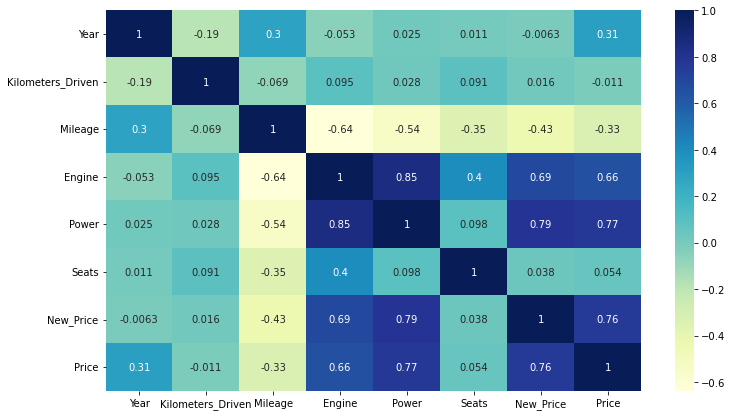

In [75]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Observation

1)Maruti and Hyundai are more popular cars with low prices. 2)Manual, low engine, and low power used cars have low prices than the automated, high engine, and high power used cars. 3) 8, 9, or 10 seats used cars are manual and have a low price 
4)Customers prefer to buy used cars that have driven low for both manual and automated used cars 
5)Automated cars' new price is more than manual car new price 6)There is a high correlation between engine and power (0.85), but not a perfect correlation so that we can keep both variables. 7)There is a high correlation between price, power, engine, and new price. 8)There is a slightly negative correlation between price and mileage and kilometers driven.



In [76]:
df2=df1.copy()

In [77]:
df2["Kilometers_Driven" + "_log"] = np.log(df2["Kilometers_Driven"] + 1)

# dropping the original columns
df2.drop("Kilometers_Driven", axis=1, inplace=True)
df2.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Kilometers_Driven_log
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti,11.184435
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai,10.621352
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,10.736418
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti,11.373675
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi,10.613271


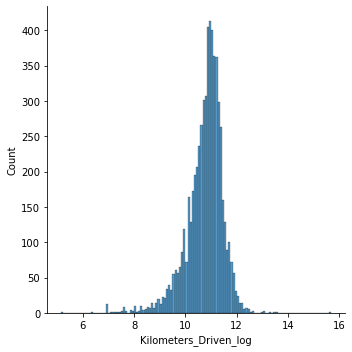

In [78]:
sns.displot(df2["Kilometers_Driven_log"]); #better than before

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


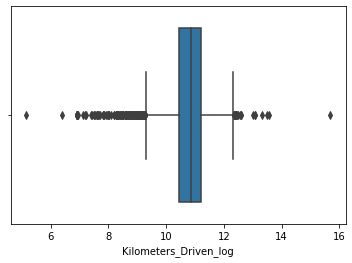

In [79]:
sns.boxplot(df2["Kilometers_Driven_log"]); #there are outliers

In [80]:
df2["Price" + "_log"] = np.log(df2["Price"] + 1)

df2.drop("Price", axis=1, inplace=True)
df2.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Kilometers_Driven_log,Price_log
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,Maruti,11.184435,1.011601
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,Hyundai,10.621352,2.602690
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,Honda,10.736418,1.704748
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,Maruti,11.373675,1.945910
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,Audi,10.613271,2.930660


In [81]:
df2["New_Price" + "_log"] = np.log(df2["New_Price"] + 1)

df2.drop("New_Price", axis=1, inplace=True)
df2.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Kilometers_Driven_log,Price_log,New_Price_log
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,11.184435,1.011601,1.873339
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,10.621352,2.602690,2.836737
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,10.736418,1.704748,2.262804
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,11.373675,1.945910,2.507157
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,10.613271,2.930660,3.991573


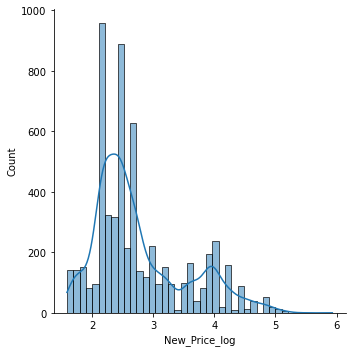

In [82]:
sns.displot(df2["New_Price_log"], kde=True);

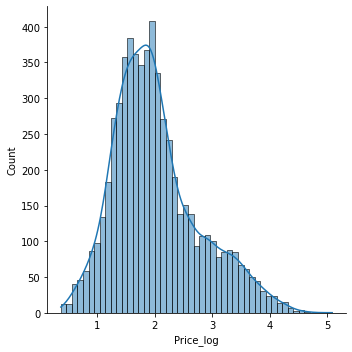

In [83]:
sns.displot(df2["Price_log"], kde=True); 

#### Outliers

In [84]:
df3=df2.copy()

In [85]:
quartiles = np.quantile(df3['Kilometers_Driven_log'][df3['Kilometers_Driven_log'].notnull()], [.25, .75])
Kilometers_Driven_log_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Kilometers_Driven_log = df3.loc[np.abs(df2['Kilometers_Driven_log'] - df3['Kilometers_Driven_log'].median()) > Kilometers_Driven_log_4iqr, 'Kilometers_Driven_log']
outliers_Kilometers_Driven_log

173      6.908755
601      7.194437
1001     7.550135
1161     6.908755
1175     7.496097
1198     6.908755
1242     6.908755
1361     5.147494
1362     7.650169
1598     6.908755
1704     7.438972
1726     6.909753
1844     7.601402
1856     7.496097
2000     7.696667
2054     6.908755
2073     7.601402
2119     7.140453
2123     7.601402
2328    15.687313
2646     6.908755
3769     6.919684
3910     7.601402
4300     7.599902
4346     7.601402
4492     7.694848
4968     7.601402
5249     6.909753
5339     6.908755
5516     7.244942
5606     6.398595
5829     7.388946
5941     6.908755
5966     6.955593
Name: Kilometers_Driven_log, dtype: float64

In [86]:
df3.loc[np.abs(df3['Kilometers_Driven_log'] - df3['Kilometers_Driven_log'].median()) > Kilometers_Driven_log_4iqr, 'Kilometers_Driven_log'] = np.nan #make these outliers NAN

In [87]:
df3["Kilometers_Driven_log"].isnull().sum() #missing values

34

In [88]:
df3["Kilometers_Driven_log"].fillna(df3.Kilometers_Driven_log.median(), inplace=True) # fill the missing values with the median of the column

In [89]:
df3["Kilometers_Driven_log"].isnull().sum()

0

In [90]:
quartiles2 = np.quantile(df3['Price_log'][df3['Price_log'].notnull()], [.25, .75])
Price_log_4iqr = 4 * (quartiles2[1] - quartiles2[0])
outliers_Price_log = df3.loc[np.abs(df2['Price_log'] - df3['Price_log'].median()) > Price_log_4iqr, 'Price_log']
outliers_Price_log #no outlier

Series([], Name: Price_log, dtype: float64)

In [91]:
quartiles3 = np.quantile(df3['Power'][df3['Power'].notnull()], [.25, .75])
Power_4iqr = 4 * (quartiles3[1] - quartiles3[0])
outliers_Power = df3.loc[np.abs(df3['Power'] - df3['Power'].median()) > Power_4iqr, 'Power']
outliers_Power

70      500.00
134     362.07
148     444.00
152     362.90
418     367.00
459     335.20
586     335.20
589     364.90
1093    335.20
1930    364.90
2095    362.07
2100    550.00
2978    394.30
3132    340.00
3242    335.30
3341    402.00
4061    444.00
4342    364.90
4388    335.20
4451    395.00
4559    335.20
4627    450.00
4691    421.00
4722    387.30
4821    450.00
4938    335.20
5088    503.00
5341    382.00
5416    335.30
5521    552.00
5603    394.30
5781    560.00
5919    488.10
Name: Power, dtype: float64

In [92]:
df3.drop(outliers_Power.index, axis=0, inplace=True)# drop the outliers


In [93]:
df3.shape

(5986, 13)

In [94]:
df3.isnull().sum() #recheck NaN

Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Brand                    0
Kilometers_Driven_log    0
Price_log                0
New_Price_log            0
dtype: int64

# Regression Model

In [95]:
df4=df3.copy()

In [96]:
X = df4.drop(["Price_log"], axis=1)
y = df4["Price_log"]

In [97]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Mileage,Engine,Power,Seats,Kilometers_Driven_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,26.60,998.0,58.16,5.0,11.184435,1.873339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,10.621352,2.836737,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,10.736418,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.373675,2.507157,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,10.613271,3.991573,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [99]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4190
Number of rows in test data = 1796


In [100]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [101]:
coef_df4 = pd.DataFrame(
    np.append(reg_model.coef_, reg_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df4

,Coefficients
Year,9.427279e-02
Mileage,-1.043493e-02
Engine,6.295252e-05
Power,3.916925e-03
Seats,2.741950e-02
Kilometers_Driven_log,-7.097109e-02
New_Price_log,3.249373e-01
Location_Bangalore,9.213506e-02
Location_Chennai,2.193673e-02
Location_Coimbatore,7.435028e-02


In [102]:
pred_train = reg_model.predict(X_train)
pred_train

array([3.01518021, 2.52020241, 1.56844794, ..., 2.77068578, 3.06518306,
       2.05179782])

In [103]:
pred_test = reg_model.predict(X_test)
pred_test

array([1.66609425, 1.98132207, 1.80134723, ..., 2.02530387, 1.68879092,
       2.2242817 ])

##### R-squared

In [104]:
rsquared_train = reg_model.score(X_train,y_train)
rsquared_train

0.9422133620405312

In [105]:
rsquared_test = reg_model.score(X_test,y_test)
rsquared_test

0.9397550825857606

#### RMSE

In [106]:
RMSE_train = np.sqrt(mean_squared_error(y_train,pred_train))
RMSE_train

0.17781698446123329

In [107]:
RMSE_test = np.sqrt(mean_squared_error(y_test, pred_test))
RMSE_test


0.18015446744750652

#### MAE

In [108]:
MAE_train= mean_absolute_error(y_train, pred_train)
MAE_train

0.13142202591578322

In [109]:
MAE_test= mean_absolute_error(y_test, pred_test)
MAE_test

0.1348158711773073

#### MAPE

In [110]:
MAPE_train = np.mean(np.abs(y_train - pred_train) / y_train) * 100
MAPE_train

7.728417849986095

In [111]:
MAPE_test = np.mean(np.abs(y_test - pred_test) / y_test) * 100
MAPE_test

7.628653328330747

#### Adjusted R-squared

In [112]:
Ad_r_sq_train= 1 - (1-reg_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Ad_r_sq_train

0.9414303831569768

In [113]:
Ad_r_sq_test= 1 - (1-reg_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Ad_r_sq_test

0.9378150507426338

In [114]:
print("Training Performance\n")
reg_model_perform_train= pd.DataFrame({"R-squared" : 0.94, "RMSE": 0.17, "MAE": 0.131, "MAPE":7.72, "Ad_R_squ":0.94 }, index=[0])
reg_model_perform_train

Training Performance



,R-squared,RMSE,MAE,MAPE,Ad_R_squ
0,0.94,0.17,0.131,7.72,0.94


In [115]:
print("Test Performance\n")
reg_model_perform_test= pd.DataFrame({"R-squared" : 0.93, "RMSE": 0.18, "MAE": 0.134, "MAPE": 7.62, "Ad_R_squ": 0.93}, index=[0])
reg_model_perform_test

Test Performance



,R-squared,RMSE,MAE,MAPE,Ad_R_squ
0,0.93,0.18,0.134,7.62,0.93


### Observation

1)The train and test R2 are 0.94 and 0.93, indicating that the model explains 94% of the total variation in the train and 93% of the total variation in test sets. Both scores are comparable. 2) The train and test RMSE values are 0.17 and 0.18; RMSE values are comparable. 3) MAPE on the test set is 7.62 4) MAE on the test set indicates that the model can predict the price within a mean error of 0.13.

# Conclusions

1)The model is not overfitting. 
2) Year and engine are some of the features that increase the price.
3) Some locations such as Delhi and Mumbai influence the price negatively, but Bangolara influence it positively. 
4) Manual cars negatively influence car price, so customers prefer manual because of low prices more than automatic cars.
5) Fuel-type electric increases the price of cars.
4) Kilometers driven negatively influence the price of used cars; if kilometers increase, the price will be decreased. 
5) The regression model predicts a used car price with an R-squared of 94% on the training set.
6) RMSE and MAE values are low on training and test sets, so the model can be used to predict the used car prices.